## feature scaling

In [1]:
from sklearn import preprocessing
import numpy as np

X_train = np.array([[1, -1, 2],
                   [2, 0, 0],
                   [0, 1, -1]])

In [2]:
X_scaled = preprocessing.scale(X_train)

In [3]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [4]:
sample = ['problem of evil',
         'evil queen',
         'horizon problem']

In [7]:
from sklearn.feature_extraction import DictVectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(),columns = vec.get_feature_names())

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

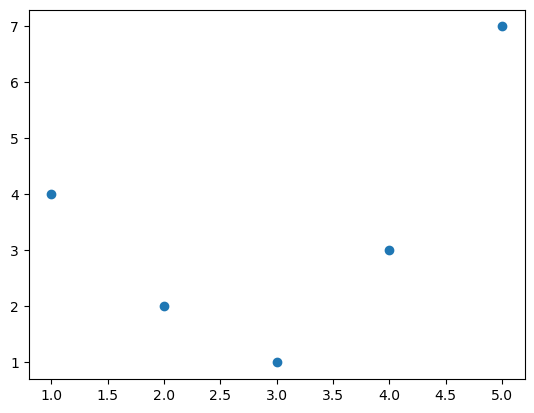

In [11]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x,y)

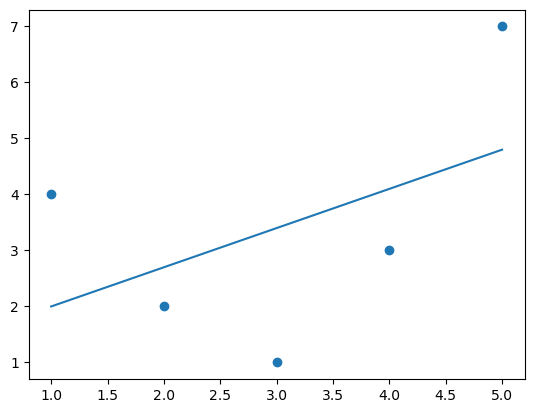

In [12]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(x,y)
plt.plot(x,yfit)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


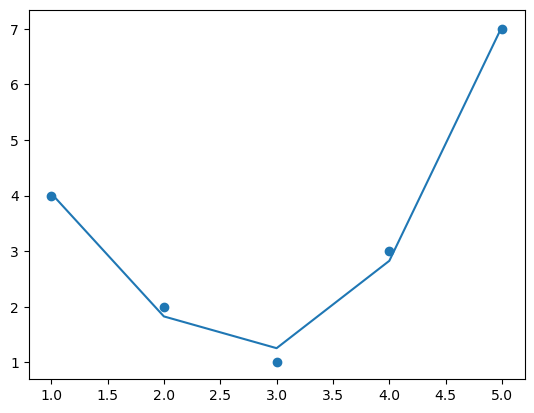

In [14]:
model = LinearRegression().fit(X2,y)
yfit = model.predict(X2)
plt.scatter(X,y)
plt.plot(x, yfit)

In [45]:
# //feature_extraction

import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from sklearn.datasets import load_breast_cancer


In [46]:
cancer_dict = load_breast_cancer()

In [51]:
data = cancer_dict.data
columns = cancer_dict.feature_names

X = pd.DataFrame(data, columns=columns)
y = pd.Series(cancer_dict.target, name='target')

df = pd.concat([X,y], axis=1)
df.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
288,11.260,19.96,73.72,394.1,0.08020,0.11810,0.092740,0.055880,0.2595,0.06233,...,22.33,78.27,437.6,0.10280,0.1843,0.15460,0.09314,0.2955,0.07009,1
501,13.820,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.067590,0.2275,0.07237,...,32.94,106.00,788.0,0.17940,0.3966,0.33810,0.15210,0.3651,0.11830,0
230,17.050,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,0.2131,0.06325,...,24.89,133.50,1189.0,0.17030,0.3934,0.50180,0.25430,0.3109,0.09061,0
164,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.132400,0.097020,0.1801,0.05553,...,28.22,184.20,2403.0,0.12280,0.3583,0.39480,0.23460,0.3589,0.09187,0
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,20.45,92.00,636.9,0.11280,0.1346,0.01120,0.02500,0.2651,0.08385,1
168,17.470,24.68,116.10,984.6,0.10490,0.16030,0.215900,0.104300,0.1538,0.06365,...,32.33,155.30,1660.0,0.13760,0.3830,0.48900,0.17210,0.2160,0.09300,0
402,12.960,18.29,84.18,525.2,0.07351,0.07899,0.040570,0.018830,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.2318,0.16040,0.06608,0.3207,0.07247,1
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.014790,0.005769,0.1680,0.06412,...,24.62,71.11,380.2,0.13880,0.1255,0.06409,0.02500,0.3057,0.07875,1
318,9.042,18.90,60.07,244.5,0.09968,0.19720,0.197500,0.049080,0.2330,0.08743,...,23.40,68.62,297.1,0.12210,0.3748,0.46090,0.11450,0.3135,0.10550,1
543,13.210,28.06,84.88,538.4,0.08671,0.06877,0.029870,0.032750,0.1628,0.05781,...,37.17,92.48,629.6,0.10720,0.1381,0.10620,0.07958,0.2473,0.06443,1


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
def apply_model(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return(f"Accuracy score: {accuracy}",
          f"Recall score: {recall}",
           f"Precisiom score: {precision}")
    
    

In [57]:
%time apply_model(X_scaled, y)

CPU times: total: 0 ns
Wall time: 45.9 ms


('Accuracy score: 0.9707602339181286',
 'Recall score: 0.9722222222222222',
 'Precisiom score: 0.9813084112149533')

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

df_pca = pd.concat([pd.DataFrame(X_pca), y], axis = 1)

In [60]:
df_pca.head()

,0,1,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


<Axes: xlabel='0', ylabel='1'>

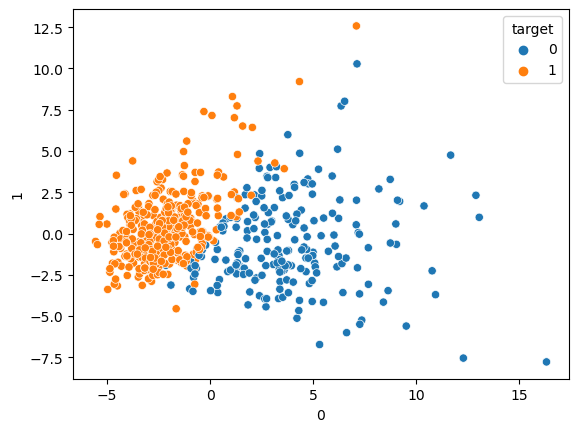

In [65]:
sns.scatterplot(x = df_pca.iloc[:, 0], y = df_pca.iloc[:, 1],hue=df_pca['target'])

In [67]:
%time apply_model(X_scaled, y)

CPU times: total: 0 ns
Wall time: 18.9 ms


('Accuracy score: 0.9707602339181286',
 'Recall score: 0.9722222222222222',
 'Precisiom score: 0.9813084112149533')

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 1)

lda.fit(X_scaled,y)
X_lda = lda.transform(X_scaled)

df_lda = pd.concat([pd.DataFrame(X_lda), y], axis=1)

In [69]:
%time apply_model(X_scaled, y)

CPU times: total: 15.6 ms
Wall time: 21 ms


('Accuracy score: 0.9707602339181286',
 'Recall score: 0.9722222222222222',
 'Precisiom score: 0.9813084112149533')

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 1, test_size=0.3)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy score: {accuracy})",
      f"Recall score: {recall})",
      f"Precision score: {precision})"
     )



Accuracy score: 0.9532163742690059) Recall score: 0.9722222222222222) Precision score: 0.9545454545454546)


In [72]:
feature_importance = pd.Series(rfc.feature_importances_, index= X.columns)
feature_importance.sort_values(ascending=False)

worst perimeter            0.166784
worst concave points       0.129030
worst radius               0.124598
worst area                 0.108132
mean concave points        0.078411
mean perimeter             0.071146
mean area                  0.060887
mean radius                0.047245
mean concavity             0.032977
area error                 0.025891
worst concavity            0.020218
worst texture              0.018088
mean texture               0.016093
perimeter error            0.015064
worst smoothness           0.010802
worst symmetry             0.009774
worst compactness          0.009063
radius error               0.007547
compactness error          0.005575
mean compactness           0.005493
mean smoothness            0.005333
symmetry error             0.004604
mean symmetry              0.004210
texture error              0.003894
concavity error            0.003666
smoothness error           0.003601
worst fractal dimension    0.003516
concave points error       0

<Axes: >

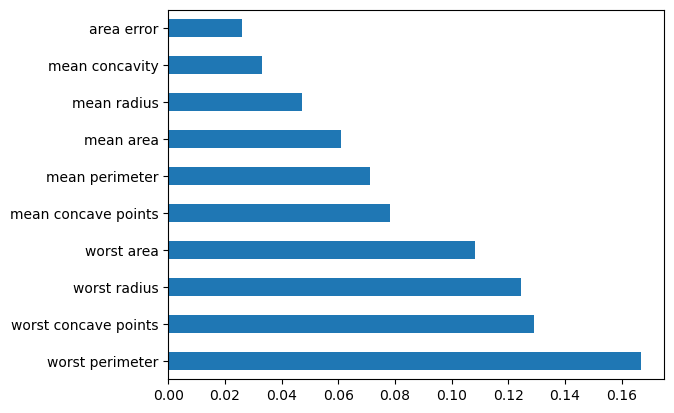

In [73]:
feature_importance.nlargest(10).plot(kind='barh')

In [18]:
pip install matplotlib